In [1]:
# blog:https://www.cnblogs.com/yudanqu/p/9031869.html

In [2]:
"""
Seaborn是对matplotlib的extend，是一个数据可视化库，提供更高级的API封装，在应用中更加的方便灵活。下面我简单介绍一下他的用法，实际应用的时候，可以直接从文档中查找这个库，这时候使用就很快捷了。

"""

'\nSeaborn是对matplotlib的extend，是一个数据可视化库，提供更高级的API封装，在应用中更加的方便灵活。下面我简单介绍一下他的用法，实际应用的时候，可以直接从文档中查找这个库，这时候使用就很快捷了。\n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import scipy.cluster
import seaborn as sns

In [5]:
%matplotlib inline

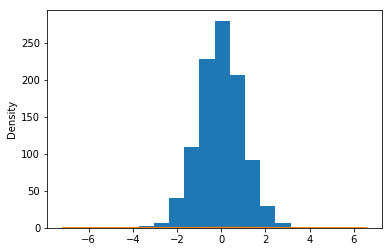

In [6]:

"""
直方图和密度图
"""
s1 = Series(np.random.randn(1000)) # 生成1000个点的符合正态分布的随机数
plt.hist(s1) # 直方图，也可以通过plot(),修改里面kind参数实现
s1.plot(kind='kde') # 密度图

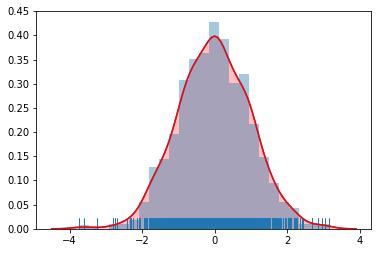

In [7]:
sns.distplot(s1,hist=True,kde=True,rug=True) # 前两个默认就是True,rug是在最下方显示出频率情况，默认为False
# bins=20 表示等分为20份的效果，同样有label等等参数
sns.kdeplot(s1,shade=True,color='r') # shade表示线下颜色为阴影,color表示颜色是红色
sns.rugplot(s1) # 在下方画出频率情况

In [8]:
"""2、柱状图和热力图"""

'2、柱状图和热力图'

In [9]:
df = sns.load_dataset('flights') # 在线下载一个数据用于实验，在sns.load_dataset()函数里有很多的数据，想了解更多的可以到GitHub中找到源码，你就会很清楚了

In [11]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [12]:
df = df.pivot(index='month',columns='year',values='passengers') # 生成一个透视表，得到一个以年、月为轴的二维数据表
# 　大家可以自己试一下，这样生成的结果是以年为columns，以月为index，表内数据为对应的乘客数量。

In [13]:
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [18]:
s = df.sum()
s

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

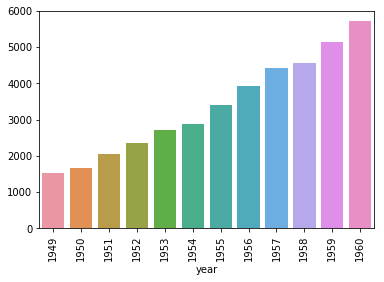

In [19]:
# 通过matplotlib绘出图形
s.plot(kind='bar')
# 通过seaborn绘出图形
sns.barplot(x=s.index,y=s.values)

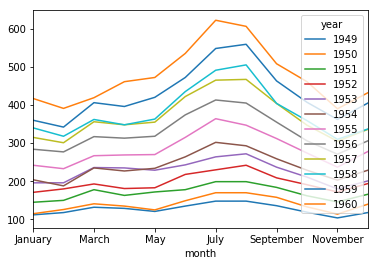

In [20]:
df.plot() # 线性的显示数据情况


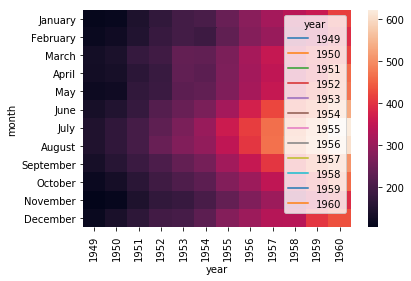

In [17]:
sns.heatmap(df) # 生成热力图
# sns.heatmap(df,annot=True,fmt='d') # annot参数是指显示数据，fmt='d'是指以整数形式显示

In [21]:
"""设置图形显示效果"""

'设置图形显示效果'

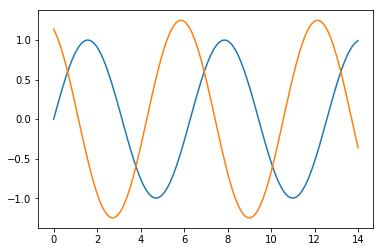

In [22]:
x = np.linspace(0,14,100)
y1 = np.sin(x)
y2 = np.sin(x+2)*1.25
def sinplot():
     plt.plot(x,y1)
     plt.plot(x,y2)

sinplot() # 以matplotlib显示，生成两个函数图像

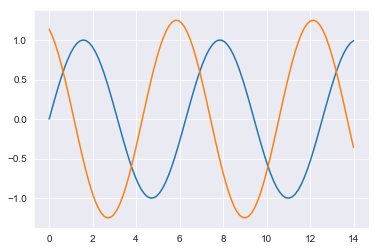

In [24]:
# seaborn的5种装饰风格
styles = ['darkgrid','dark','white','whitegrid','tricks'] # 颜色代表背景颜色，grid代表是否有网格
sns.set_style(styles[0]) # 进行装饰，括号内可以直接写装饰风格
sinplot() # 经过修饰之后的图像

sns.axes_style() # 显示当前主题的内容，这些数据都可以修改微调
# 更改的时候就将其信息的以字典形式复制到set_style()里，当做参数来修改（注意是以字典的形式）
sns.set() # 设置风格为空，即清空自己定义的，恢复到默认的时候

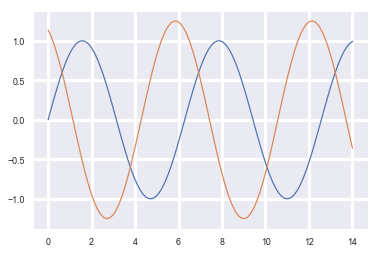

In [25]:
context = ['paper','notebook','talk','poster'] # seaborn本身定义好的
sns.set_context('paper',rc={'grid.linewidth':3.0}) # rc参数
sinplot()

sns.plotting_context() # 显示出当前状态的数据
sns.set() # 恢复到默认

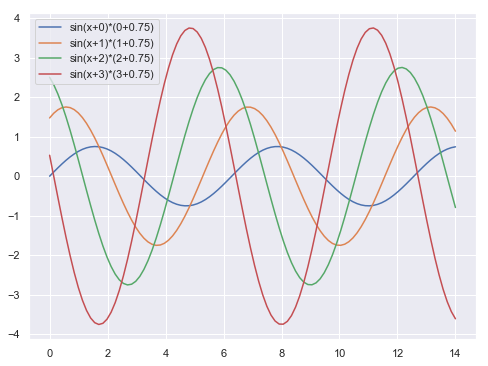

In [27]:
# 先绘制一个图像
def sinplot1():
    x = np.linspace(0,14,100)
    plt.figure(figsize=(8,6)) # 图像比较小时，通过这个函数更改大小
    for i in range(4):
        plt.plot(x,np.sin(x+i)*(i+0.75),label='sin(x+%s)*(%s+0.75)' % (i,i))
    plt.legend()
sinplot1()

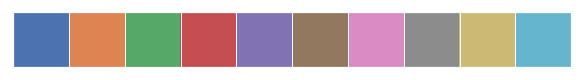

In [28]:
# 引入seaborn
sns.color_palette() # 使用调色板
# 不传入参数返回当前使用的调色板（RGB）
sns.palplot(sns.color_palette()) # 画出调色板，参数为上面的调色板

In [30]:
pal.style = ['deep','nuted','pastel','bright','dark','colorblind'] # seaborn默认定义的调色板

# 第一种设置画板方式
sns.set_palette(sns.color_palette('dark')) # 设置色板
sns.set() # 恢复默认风格

# 第二种设置画板方式，并且最后恢复到默认
with sns.color_palette():
    sinplot1() # 在内部调整画板输出图形，当with结束时，则恢复默认

NameError: name 'pal' is not defined

In [31]:
# 默认提供的色板数量是固定的，如果图像是更多的函数，那么颜色将循环色板中的风格。如果想不使他颜色有相同，可以通过sns.color_palette()来修改
sns.color_palette([(0.5,0.2,0.6),(0.3,0.3,0.4)]) # 因为色板是以列表的形式存储的，里面的每种风格以元组的形式存在所以需要用[()]

# 第二种增加色板颜色的方法
sns.color_palette('hls',8) # hls方法，后面写参数8，即生成有8种不同颜色的色板

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [36]:
df = pd.DataFrame(np.arange(12, 32).reshape((5, 4)), index=["a", "b", "c", "d", "e"], columns=["WW", "XX", "YY", "ZZ"])
df.loc[["b"],["YY"]] = np.nan   # NaN是float类型，对应列会自动变成float类型。
df.loc[["d"],["XX"]] = np.nan
df

,WW,XX,YY,ZZ
a,12,13.0,14.0,15
b,16,17.0,NaN,19
c,20,21.0,22.0,23
d,24,NaN,26.0,27
e,28,29.0,30.0,31


In [37]:
df.mean()

WW    20.0
XX    20.0
YY    23.0
ZZ    23.0
dtype: float64

In [39]:
type(df.mean())

pandas.core.series.Series

In [100]:
df.dtypes

WW      int32
XX    float64
YY    float64
ZZ     object
dtype: object

In [50]:
df.loc[["b"],["ZZ"]]=""

In [51]:
df

,WW,XX,YY,ZZ
a,12,13.0,14.0,15
b,16,17.0,NaN,
c,20,21.0,22.0,23
d,24,NaN,26.0,27
e,28,29.0,30.0,31


In [52]:
pd.isnull(df)

,WW,XX,YY,ZZ
a,False,False,False,False
b,False,False,True,False
c,False,False,False,False
d,False,True,False,False
e,False,False,False,False


In [54]:
df.columns

Index(['WW', 'XX', 'YY', 'ZZ'], dtype='object')

In [55]:
df.dtypes

WW      int32
XX    float64
YY    float64
ZZ     object
dtype: object

In [62]:
df_str=df.astype("str" ,copy=True)

In [63]:
df_str

,WW,XX,YY,ZZ
a,12,13.0,14.0,15
b,16,17.0,nan,
c,20,21.0,22.0,23
d,24,nan,26.0,27
e,28,29.0,30.0,31


In [65]:
df_str.dtypes

WW    object
XX    object
YY    object
ZZ    object
dtype: object

In [66]:
df_str.isnull()

,WW,XX,YY,ZZ
a,False,False,False,False
b,False,False,False,False
c,False,False,False,False
d,False,False,False,False
e,False,False,False,False


In [83]:
type(np.nan)

float

In [101]:
df_str.loc[["b"],["YY"]].dtypes
# 即可以看出它们的类型 是str 

YY    object
dtype: object

In [102]:
df_str.loc[["b"],["ZZ"]]="nan"
df_str.loc[["b"],["XX"]]="NAN"
df_str.loc[["b"],["WW"]]= np.nan
# df_str.loc[["b"],["WW"]]="NA" , 如果是na,这种写法转换成float时不能通过
# df_str.loc[["b"],["WW"]]="" , 如果是na,这种写法不能通过

In [103]:
df_str_float=df_str.astype("float32", copy=True)

In [104]:
df_str_float

,WW,XX,YY,ZZ
a,12.0,13.0,14.0,15.0
b,NaN,NaN,NaN,NaN
c,20.0,21.0,22.0,23.0
d,24.0,NaN,26.0,27.0
e,28.0,29.0,30.0,31.0


In [105]:
df_str_float.isnull()

,WW,XX,YY,ZZ
a,False,False,False,False
b,True,True,True,True
c,False,False,False,False
d,False,True,False,False
e,False,False,False,False


In [106]:
np.isnan(df_str_float)

,WW,XX,YY,ZZ
a,False,False,False,False
b,True,True,True,True
c,False,False,False,False
d,False,True,False,False
e,False,False,False,False


In [109]:
x = stats.loggamma.rvs(5, size=30) + 5

In [117]:
y, lmax_mle = stats.boxcox(x)

In [118]:
lmax_pearsonr = stats.boxcox_normmax(x)

In [119]:
stats.boxcox_normmax(x, method='all')

array([1.64615497, 1.49420943])

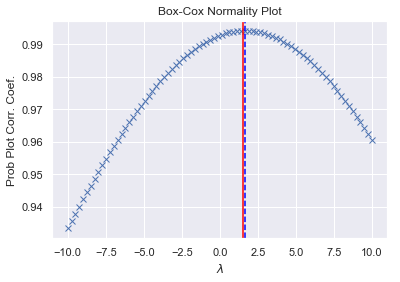

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(x, -10, 10, plot=ax)
ax.axvline(lmax_mle, color='red')
ax.axvline(lmax_pearsonr, color='blue', ls='--')

plt.show()